Testing the lower bound graph

In [1]:
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGenerator, ContactGraphGeneratorParams
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams
import logging
logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)
logging.getLogger("large_gcs.geometry.convex_set").setLevel(logging.INFO)
logger = logging.getLogger(__name__)
import numpy as np
import matplotlib.pyplot as plt


INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 1 body pairs...


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-05


100%|██████████| 1/1 [00:00<00:00, 324.69it/s]
INFO:large_gcs.graph.contact_graph:Loading 4 contact pair modes for 2 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 4 sets...
100%|██████████| 4/4 [00:00<00:00, 4664.22it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 6/6 [00:00<00:00, 32768.00it/s]
INFO:large_gcs.graph.graph:Adding 6 vertices to graph...
100%|██████████| 6/6 [00:00<00:00, 34663.67it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 11/11 [00:00<00:00, 40757.37it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 11/11 [00:00<00:00, 24308.40it/s]
INFO:large_gcs.graph.graph:Adding 11 edges to graph...
100%|██████████| 11/11 [00:00<00:00, 23733.20it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(2, 6), n_vertices=6, n_edges=11, source=[array([-2, -2])], target='regions', workspace=array([[-3,  3],
       [-3,  3]]), de

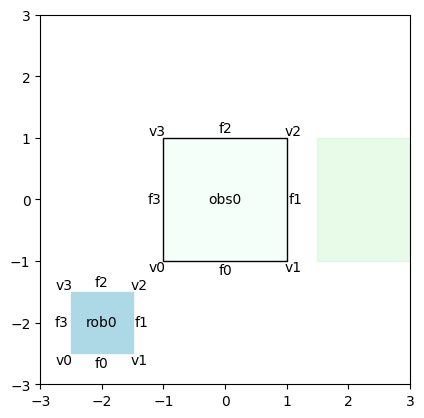

In [2]:
graph_name = "cg_simple_1_1"
graph_file = ContactGraphGeneratorParams.graph_file_path_from_name(
    graph_name
)
cg = ContactGraph.load_from_file(
    graph_file,
    should_use_l1_norm_vertex_cost=True,
)
cg.plot()

In [3]:
# for v in cg.vertices:
#     print(v)
#     cg.generate_and_plot_samples_in_set(v, 20)

In [4]:
from large_gcs.graph.lower_bound_graph import LowerBoundGraph


# lbg=LowerBoundGraph.load_from_name(graph_name)
lbg = LowerBoundGraph.generate_from_gcs(graph_name, cg)

DEBUG:large_gcs.graph.lower_bound_graph:Processing vertices of original graph...
Triplets: 100%|██████████| 4/4 [00:00<00:00, 2616.53it/s]
INFO:large_gcs.graph.lower_bound_graph:Saved checkpoint after 0.00 seconds
DEBUG:large_gcs.graph.lower_bound_graph:before zero cost edges: 8
DEBUG:large_gcs.graph.lower_bound_graph:after zero cost edges: 16
INFO:large_gcs.graph.lower_bound_graph:Finished generating lower bound graph in 0.00 seconds
INFO:large_gcs.graph.lower_bound_graph:duration in H:M:S 00:00:00
INFO:large_gcs.graph.lower_bound_graph:Vertices: 8, Edges: 16


In [6]:
len([c for c in lbg._edges.values() if c>0])

8

5.0: ("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)") -> ("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)")


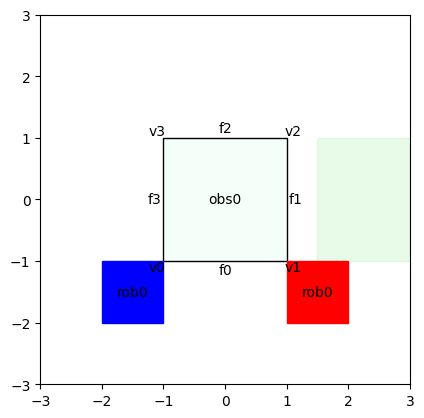

5.0: ("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)") -> ("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)")


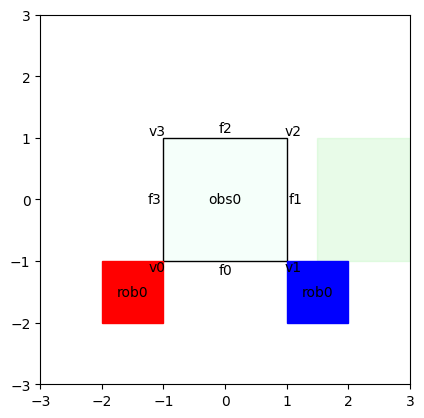

5.0: ("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)") -> ("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)")


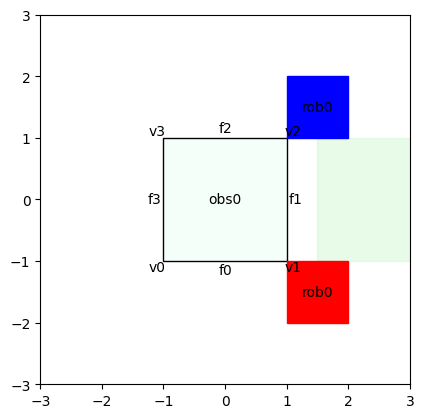

5.0: ("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)") -> ("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)")


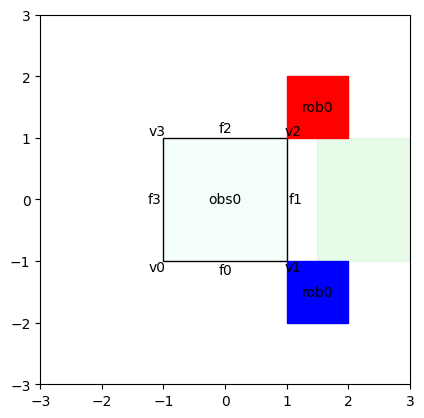

5.0: ("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)") -> ("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)")


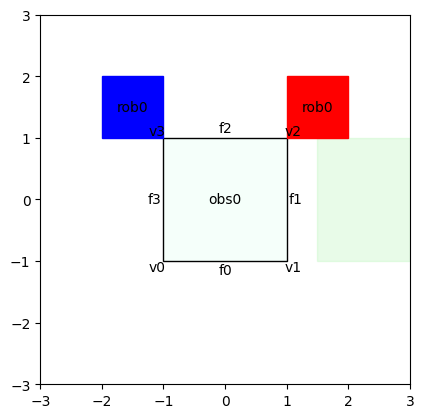

5.0: ("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)") -> ("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)")


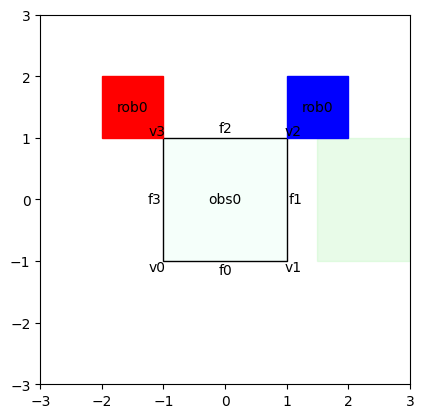

5.0: ("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)") -> ("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)")


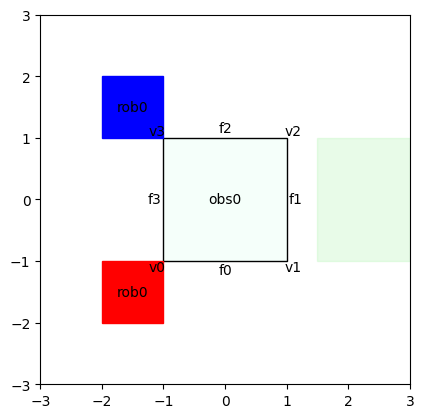

5.0: ("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)") -> ("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)")


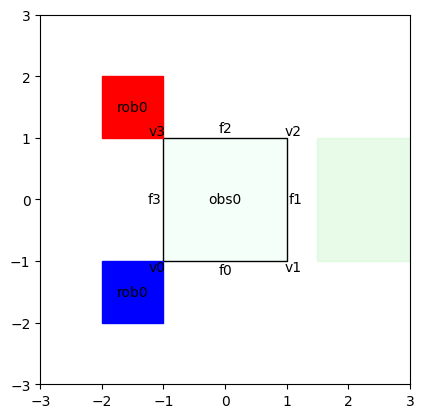

In [7]:
for (u, v), c in lbg._edges.items():
    if c == 0:
        continue
    print(f"{c}: {u} -> {v}")
    pos_v = lbg._vertices[v].point
    pos_u = lbg._vertices[u].point
    cg.plot(show_source=False)
    cg.robots[0].plot_at_position(pos_u, color="red")
    cg.robots[0].plot_at_position(pos_v, color="blue")
    plt.show()

In [5]:
lbg._parent_vertex_to_vertices["target"]

[]

In [ ]:
lbg.run_dijkstra()

In [ ]:
len(lbg._g)

In [ ]:
len(lbg._parent_vertex_to_vertices["target"])

In [ ]:
lbg._parent_vertex_to_vertices["target"]

In [ ]:
# How many g values are greater than 0?
nonzero_cost_vertices = [(key,x) for (key,x) in lbg._g.items() if x > 0]
print(len(nonzero_cost_vertices))

In [ ]:
sorted_vertices = sorted(nonzero_cost_vertices, key=lambda x: x[1])

In [ ]:
# sort vertices by cost
# 
for v, c in sorted_vertices:
    pos = lbg._vertices[v].point
    cg.plot(show_source=False)
    cg.robots[0].plot_at_position(pos)
    
    print(lbg._vertices[v].point, c, v)
    plt.show()


In [ ]:
len([c for c in lbg._edges.values() if c==0])